## Domain – Retail/Fashion
## focus – Optimize sales

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading data from file into dataframe

df=pd.read_csv(r"./datasets/FyntraCustomerData.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### 1. Compute -- Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Is there a correlation?

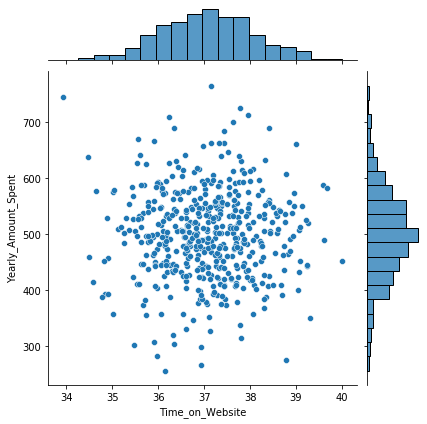

In [11]:
##plt.figure(figsize=(15,10))
sns.jointplot(x = "Time_on_Website", y = "Yearly_Amount_Spent",
              kind = "scatter", data = df)
plt.show()

There is no such correlation between Time on Website and Yearly Amount Spent

### 2. Compute – Do the same as above but now with Time on App and Yearly Amount Spent. Is this correlation stronger than 1st One? 

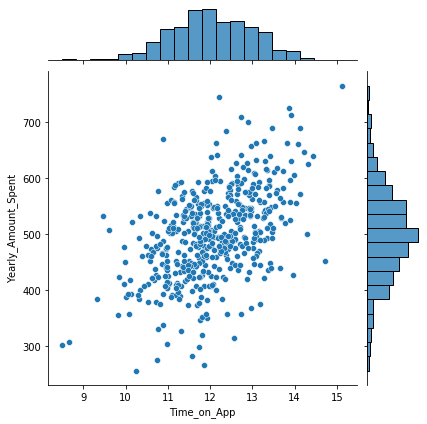

In [12]:
sns.jointplot(x = "Time_on_App", y = "Yearly_Amount_Spent",
              kind = "scatter", data = df)
plt.show()

Yes. This has a stronger correlation compared to time spend on website

### 3. Compute -- Explore types of relationships across the entire data set using pairplot . Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

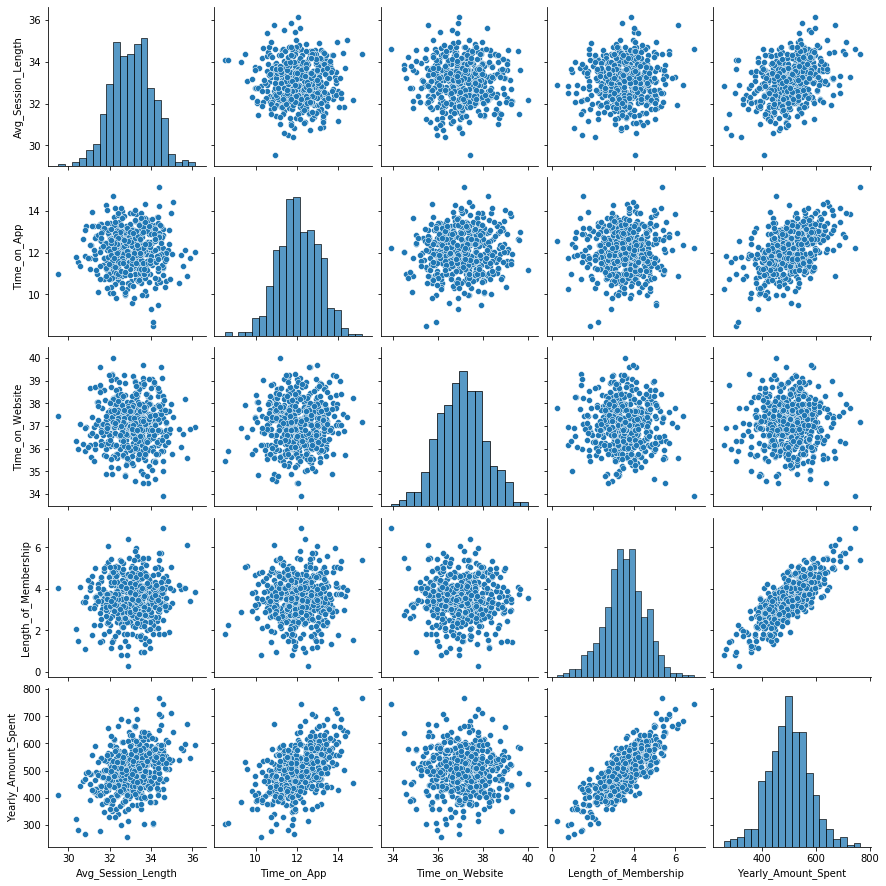

In [14]:
sns.pairplot(df)
plt.show()

1. There is strong correlation between Lenght of Membership and Yearly Amount Spent
2. There is a positive correlation between Time Spent of App and Yearly Amount spent
3. There is between rest of the data elements

### 4. Compute – Create linear model plot of Length of Membership and Yearly Amount Spent. Does the data fits well in linear plot?

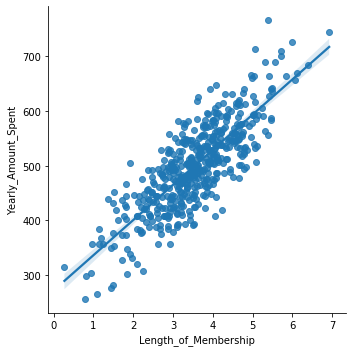

In [15]:
sns.lmplot(x ='Length_of_Membership', y ='Yearly_Amount_Spent', data = df)

Yes. The data fits well in linear plot.

### 5. Compute – Train and Test the data and answer multiple questions -- What is the use of random_state=85?

In [19]:
x_col = ['Avg_Session_Length',
'Time_on_App',
'Time_on_Website',
'Length_of_Membership']
y_col= ['Yearly_Amount_Spent']

In [16]:
## importing test train split package
from sklearn.model_selection import train_test_split

In [20]:
X=df[x_col]

In [21]:
Y=df[y_col]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=85)

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(350, 4) (150, 4) (350, 1) (150, 1)


In [26]:
## impporting Lingreesion regressor
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()
  
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [36]:
df_train = y_test.copy()

In [60]:
df_train.reset_index(inplace=True)

In [61]:
df_train

,index,Yearly_Amount_Spent,pred_amount
0,412,444.053827,NaN
1,266,554.003093,NaN
2,309,302.189548,NaN
3,212,536.130897,NaN
4,105,497.513683,487.016702
...,...,...,...
145,495,573.847438,NaN
146,32,588.712605,499.815145
147,285,471.602884,NaN
148,395,484.876965,NaN


In [62]:
df_train.drop("index", axis=1, inplace=True)

In [64]:
df_train2= pd.DataFrame(y_pred)

In [65]:
df_train["pred_amount"] = df_train2

In [66]:
df_train

,Yearly_Amount_Spent,pred_amount
0,444.053827,467.000472
1,554.003093,543.208868
2,302.189548,282.723234
3,536.130897,538.101853
4,497.513683,512.597315
...,...,...
145,573.847438,575.978693
146,588.712605,577.616509
147,471.602884,466.019640
148,484.876965,481.585620


### 6. Compute – Predict the data and do a scatter plot. Check if actual and predicted data match?

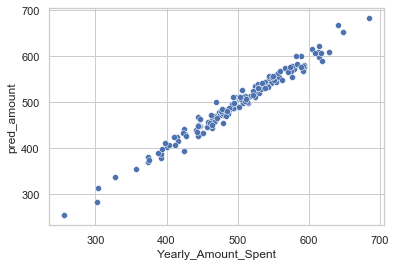

In [67]:
sns.set(style='whitegrid')
sns.scatterplot(x="Yearly_Amount_Spent",y="pred_amount", data=df_train)

### 7. What is the value of Root Mean Squared Error?

In [68]:
## importing model metrics
from sklearn.metrics import mean_squared_error

In [72]:
round(mean_squared_error(df_train["Yearly_Amount_Spent"],df_train["pred_amount"],  squared=False),2)

10.57